In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [35]:
# Load the data
df = pd.read_csv('../data/togo-dapaong_qc.csv')

In [46]:
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,231.112024,149.671384,113.127457,225.884852,219.188607,27.751788,55.013160,2.331217,3.175654,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,441.100000,241.300000,210.200000,421.900000,410.100000,31.100000,80.800000,3.200000,4.300000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1196.000000,904.100000,586.000000,1178.000000,1143.000000,41.400000,99.800000,6.700000,8.800000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,320.731294,248.463610,151.031627,316.938883,307.332783,4.758023,28.778732,1.388161,1.770292,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [38]:
#from df.discribe() we can see that the columns DHI, DNI, GHI, HAVE NEGATIVE VALUES WHICH IS NOT POSSIBLE
#THEREFORE WE CAN DROP THE ROWS WITH NEGATIVE VALUES
# Create a mask for negative values
mask = (df[['DHI', 'DNI', 'GHI']] < 0).any(axis=1)
# Drop rows with negative values
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)



In [39]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
print(df["Timestamp"].dtypes)

datetime64[ns]


In [40]:
from scipy.stats import zscore

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z = df[cols].apply(zscore)

# Identify outliers (|Z| > 3)
outliers = (z.abs() > 3)

# Replace outliers with the median of non-outliers
for col in cols:
    mean_non_outliers = df.loc[~outliers[col], col].mean()  # Median of non-outliers
    df.loc[outliers[col], col] = mean_non_outliers  # Replace outliers with median

# Verify the changes
print("Outliers cleaned. Updated dataset:")
print(df[cols].describe())

Outliers cleaned. Updated dataset:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      231.112024     149.671384     113.127457     225.884852   
std       320.731294     248.463610     151.031627     316.938883   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       441.100000     241.300000     210.200000     421.900000   
max      1196.000000     904.100000     586.000000    1178.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      219.188607       2.331217       3.175654  
std       307.332783       1.388161       1.770292  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.400000       1.900000  
50%         4.300000     

In [41]:
# After processing (e.g., outlier replacement)
df_cleaned = df.copy()  # Optional: work on a copy to preserve original

# Save to CSV
df_cleaned.to_csv('../data/cleaned_Togo_solar_data.csv', index=False)
print("Saved cleaned data to 'cleaned_solar_data.csv'")

Saved cleaned data to 'cleaned_solar_data.csv'


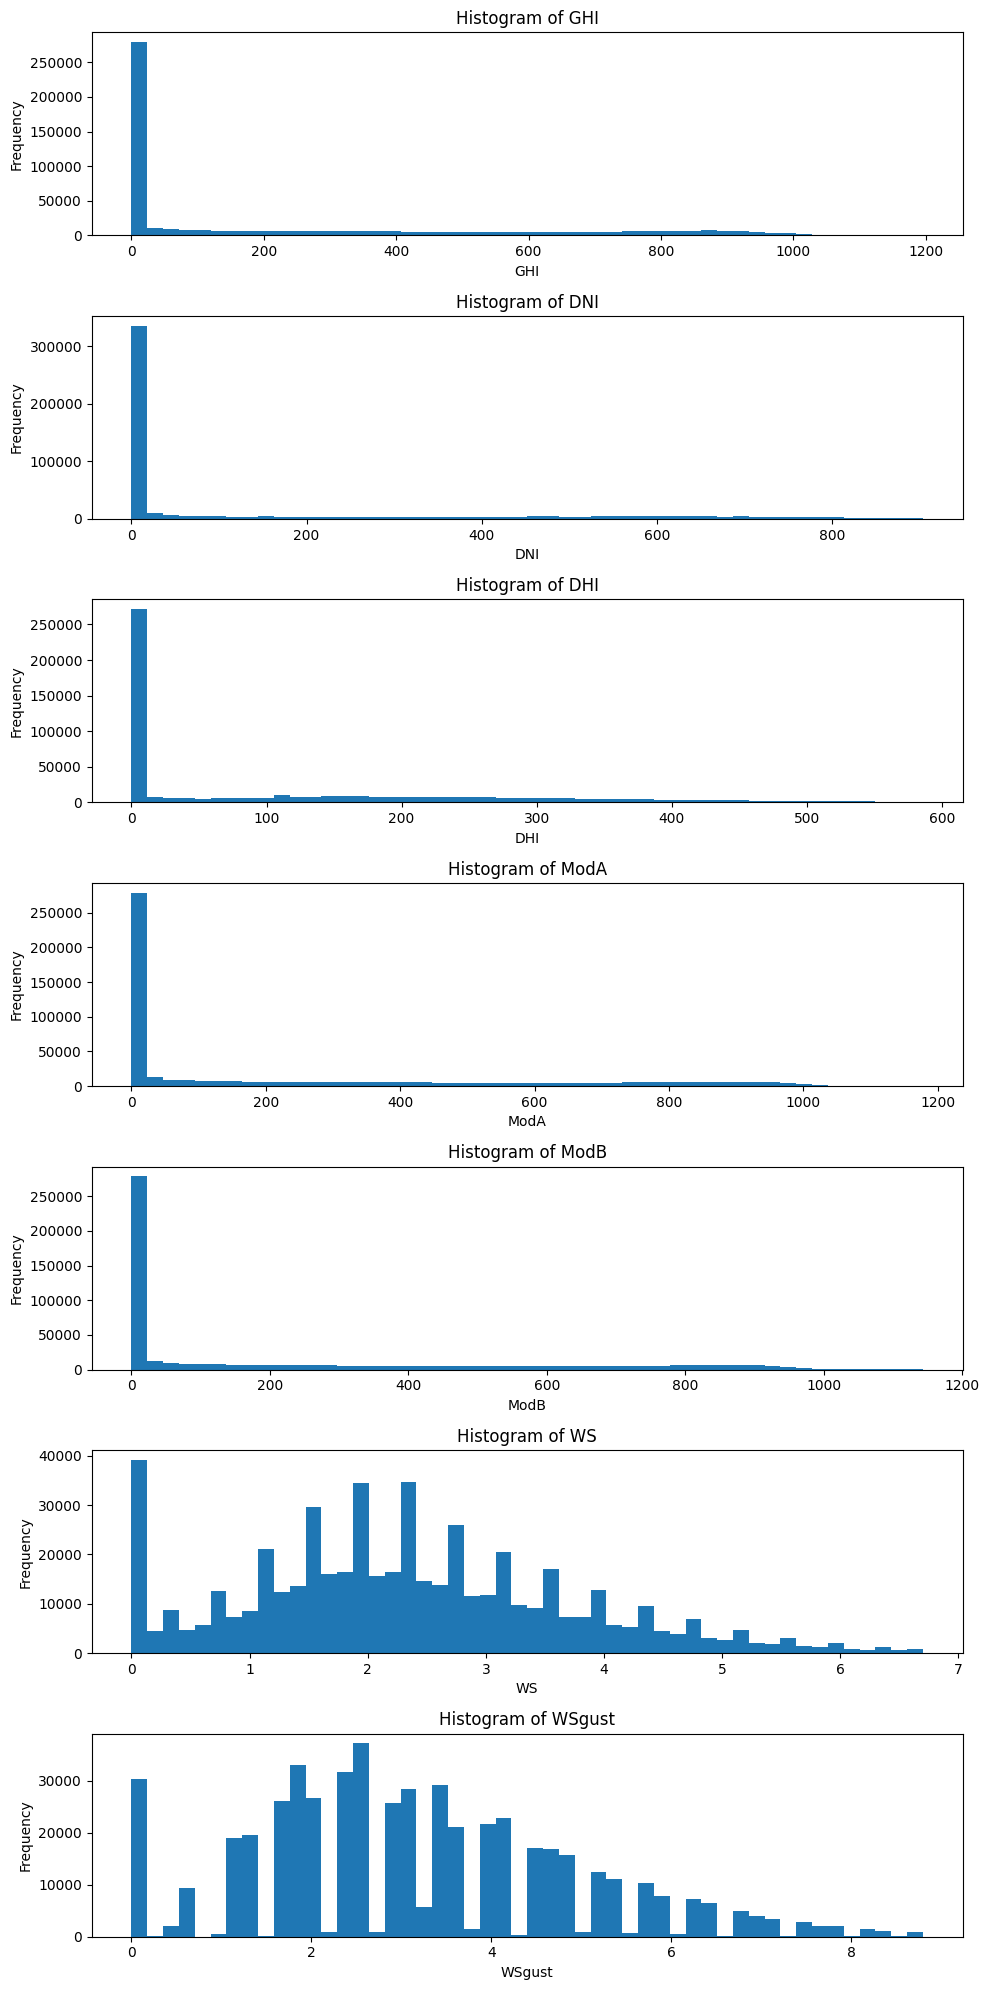

In [42]:
fig, axes = plt.subplots(nrows=len(cols), figsize=(10, 20))  # Adjust size as needed

# Plot histograms for each column
for ax, col in zip(axes, cols):
    df[col].plot.hist(ax=ax, bins=50, title=f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Prevent overlapping labels
plt.show()

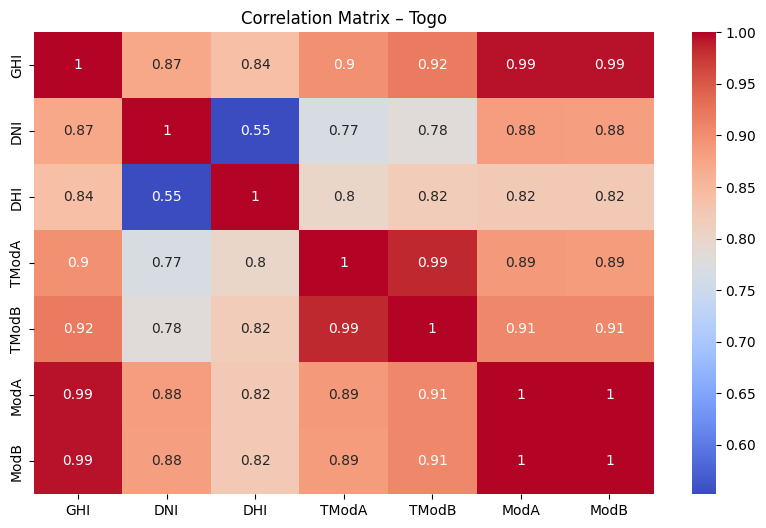

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix – Togo")
plt.show()

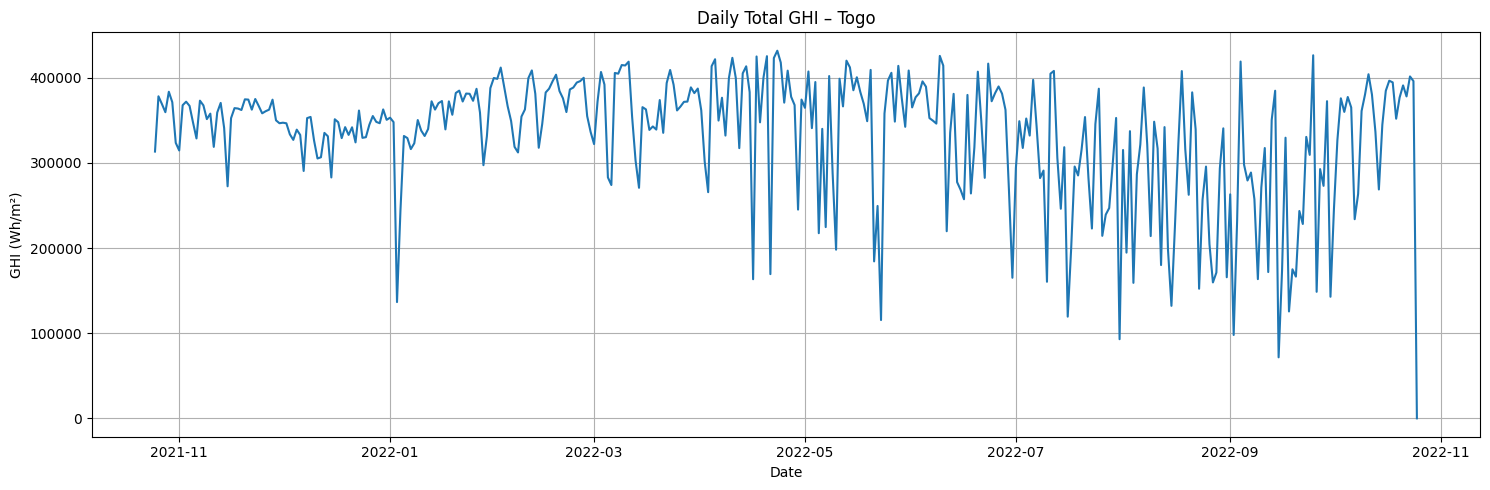

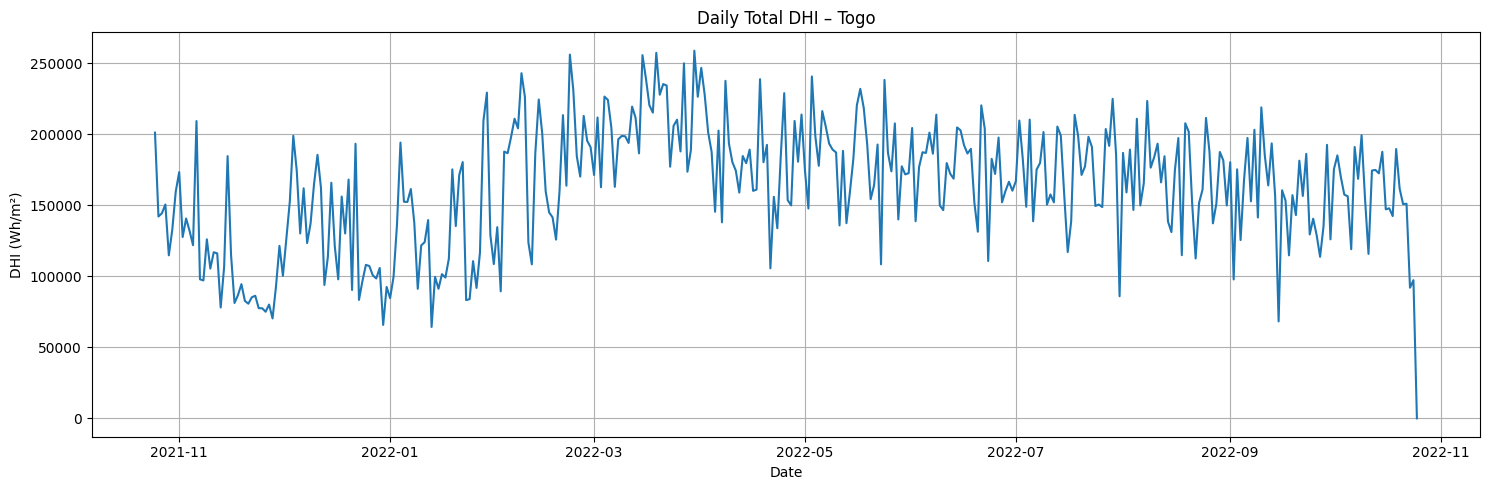

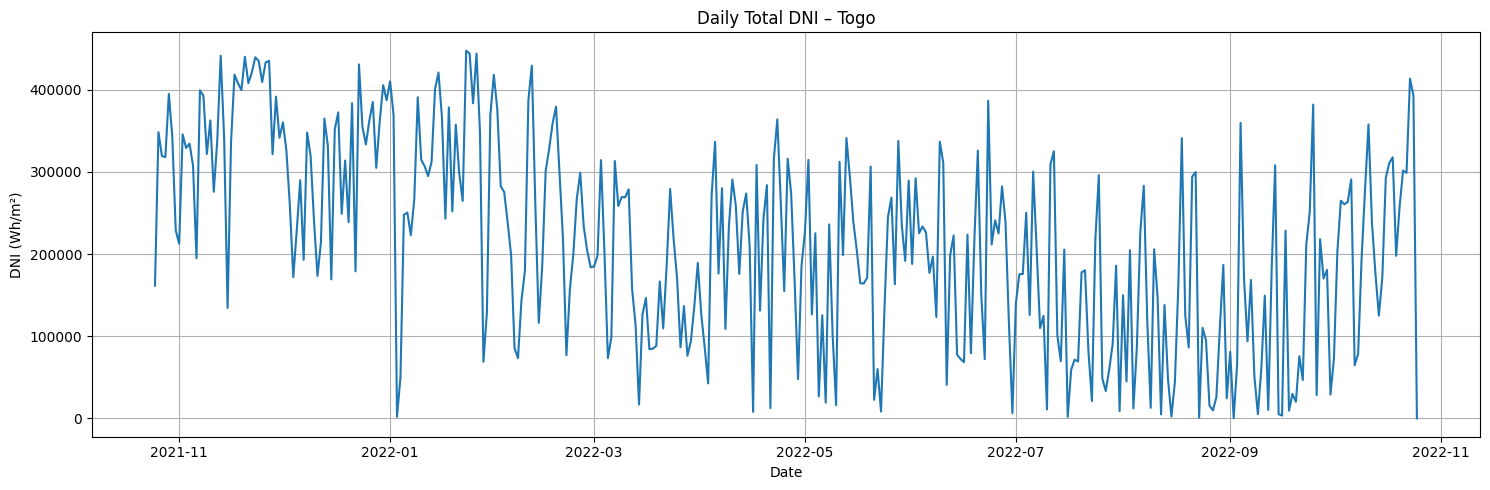

In [44]:


df['Date'] = df['Timestamp'].dt.date
daily_ghi = df.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi.plot()
plt.title("Daily Total GHI – Togo")
plt.xlabel("Date")
plt.ylabel("GHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


daily_dhi = df.groupby('Date')['DHI'].sum()
plt.figure(figsize=(15,5))
daily_dhi.plot()
plt.title("Daily Total DHI – Togo")
plt.xlabel("Date")
plt.ylabel("DHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

Daily_dni = df.groupby('Date')['DNI'].sum()
plt.figure(figsize=(15,5))
Daily_dni.plot()
plt.title("Daily Total DNI – Togo")
plt.xlabel("Date")
plt.ylabel("DNI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
plt.figure(figsize=(12, 8))

# Create the bubble chart
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.6, c=df['BP'], cmap='viridis')

# Add labels and title
plt.title("Bubble Chart – GHI vs Tamb (Bubble Size = RH, Color = BP)")
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (Wh/m²)")
plt.colorbar(label="BP (hPa)")  # Color bar for BP
plt.grid(True)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

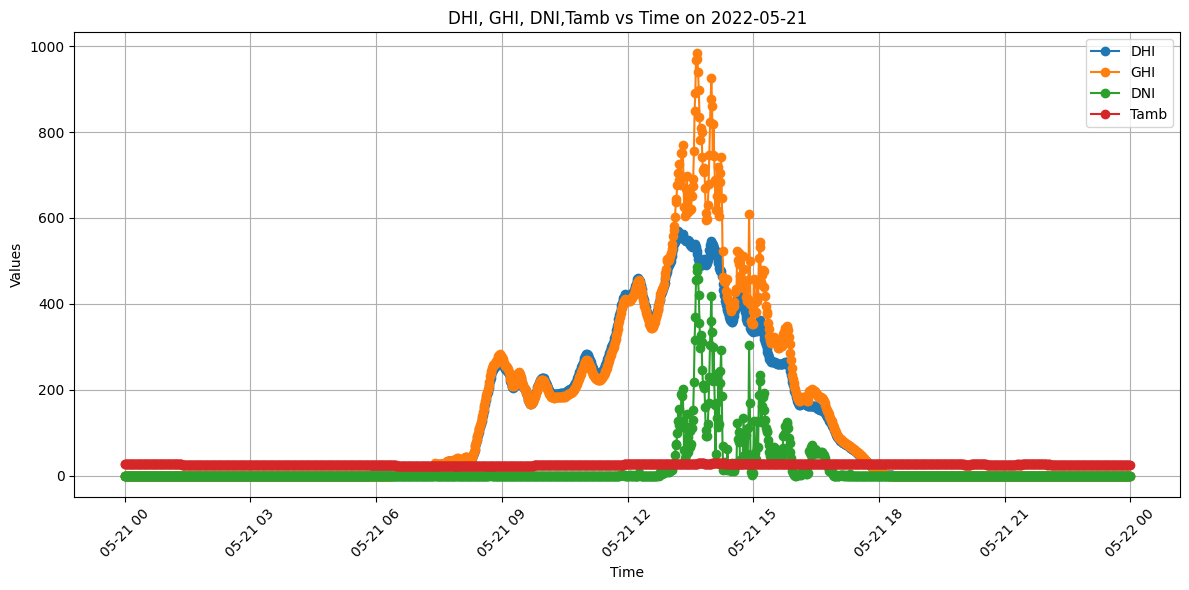

In [ ]:
import random

# Select a random day from the dataset
random_day = random.choice(df['Timestamp'].dt.date.unique())

# Filter the data for the selected day
day_data = df[df['Timestamp'].dt.date == random_day]

# Plot DHI, GHI, and DNI against time
plt.figure(figsize=(12, 6))
plt.plot(day_data['Timestamp'], day_data['DHI'], label='DHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['GHI'], label='GHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['DNI'], label='DNI', marker='o')
plt.plot(day_data['Timestamp'], day_data['Tamb'], label='Tamb', marker='o')


plt.title(f"DHI, GHI, DNI,Tamb vs Time on {random_day}")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate mean and median for DHI, GHI, and DNI
statistics = {
    "DHI": {"mean": df["DHI"].mean(), "median": df["DHI"].median()},
    "GHI": {"mean": df["GHI"].mean(), "median": df["GHI"].median()},
    "DNI": {"mean": df["DNI"].mean(), "median": df["DNI"].median()},
}

# Print the results
for key, value in statistics.items():
    print(f"{key} - Mean: {value['mean']}, Median: {value['median']}")

DHI - Mean: 111.04224726176393, Median: 1.8
GHI - Mean: 230.9439780205981, Median: 2.0
DNI - Mean: 148.98626697022078, Median: 0.0
